In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

### Definindo a Curva Roc

In [2]:
def exibirCurvaROC(title, modeloClassificador, x_test, y_test):
    y_preds = modeloClassificador.predict_proba(x_test)

    # take the second column because the classifier outputs scores for the 0 class as well
    preds = y_preds[:,1]

    # fpr (false-positive-rate) e tpr (true-positive-rate)
    fpr, tpr, _ = metrics.roc_curve(y_test, preds)

    auc_score = metrics.auc(fpr, tpr)

    # Construindo o Gráfico
    plt.clf()
    plt.title(title)
    plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))
    plt.plot([0,1],[0,1],'r--')

    plt.xlim([-0.1,1.1])
    plt.ylim([-0.1,1.1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

    plt.legend(loc='lower right')
    plt.show()

In [3]:
def plotarCurvaROC(title, modeloClassificador, base, alvo):
    x_train, x_test, y_train, y_test = train_test_split(base.drop(alvo,axis=1),
                                                        base[alvo],
                                                        test_size=0.3,
                                                        random_state=42);

    # Fit nos dados
    modeloClassificador.fit(x_train, y_train)

    # Realizando a predição
    resultadoTeste = modeloClassificador.predict(x_test)
    
    # Exibindo a Curva
    exibirCurvaROC(title, modeloClassificador, x_test, y_test)

### Definindo os Modelos

In [6]:
hiperparametrosAB = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0, n_estimators=50, random_state=410)

hiperparametrosRF = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None, 
                                           criterion='gini', max_depth=None, max_features='auto', 
                                           max_leaf_nodes=None, max_samples=None, 
                                           min_impurity_decrease=0.0,
                                           min_samples_leaf=1, min_samples_split=2,
                                           min_weight_fraction_leaf=0.0, n_estimators=100,
                                           n_jobs=-1, oob_score=False, random_state=7374, verbose=0,
                                           warm_start=False)

hiperparametrosLR = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, 
                                       intercept_scaling=1, l1_ratio=None, max_iter=1000, multi_class='auto', 
                                       n_jobs=None, penalty='l2', random_state=1340, solver='lbfgs', 
                                       tol=0.0001, verbose=0, warm_start=False)
                    

hiperparametrosGB = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None,
                           random_state=2333, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [7]:
modelos = {
            "AB": hiperparametrosAB,
            "RF": hiperparametrosRF,
            "LR": hiperparametrosLR,
            "GB": hiperparametrosGB,
          }

### Visualizando a curva ROC - Óbito / Curado

In [8]:
# Carregando a Base de Dados
url = 'Vacinas/OC/oc-vacina-6040-sp.xlsx'
alvo = 'evolucaoCaso'
baseObitoCurado = pd.read_excel(url)

In [9]:
# Selecionando os atributos
atributosSelecionados = ['faixaetaria', 'dispneia', 'qntVacinas', 'dorDeGarganta', 
                         'coriza', 'diabetes', 'dorDeCabeca', 'cardiaca', 'evolucaoCaso']

baseObitoCurado = baseObitoCurado.loc[:, atributosSelecionados]

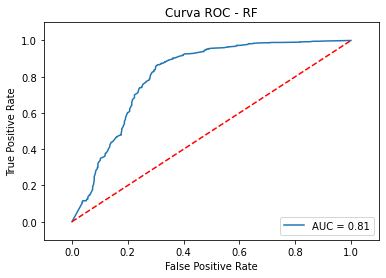

In [11]:
# Curva ROC - Random Forest
plotarCurvaROC('Curva ROC - RF', modelos["RF"], baseObitoCurado, alvo)

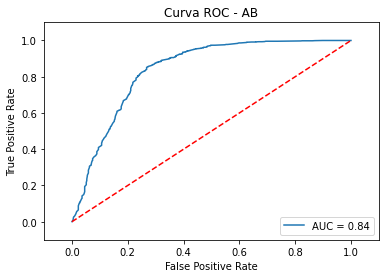

In [12]:
# Curva ROC - Ada Boost
plotarCurvaROC('Curva ROC - AB', modelos["AB"], baseObitoCurado, alvo)

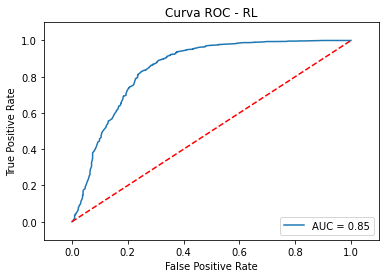

In [14]:
# Curva ROC - Regressão Logística
plotarCurvaROC('Curva ROC - RL', modelos["LR"], baseObitoCurado, alvo)

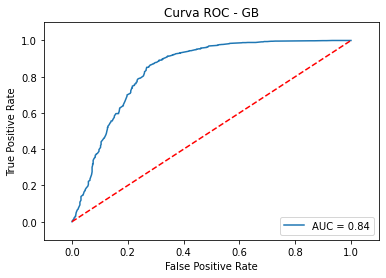

In [15]:
# Curva ROC - XGBoost
plotarCurvaROC('Curva ROC - GB', modelos["GB"], baseObitoCurado, alvo)

### Visualizando a curva ROC - Óbito / Curado

In [17]:
# Carregando a Base de Dados
urlIC = 'Vacinas/Regioes/IC/ic-vacina-6040-sudeste.xlsx'
alvo = 'evolucaoCaso'
baseInternadoCurado = pd.read_excel(urlIC)

In [19]:
# Definindo os atributos removidos
colunasRemovidas = ['dataPrimeiraDose', 'dataSegundaDose', 'disturbiosGustatorios', 'disturbiosOlfativos', 
                    'puerpera', 'respiratoria', 'tosse', 'febre', 'assintomatico', 'obesidade']

baseInternadoCurado = baseInternadoCurado.drop(columns = colunasRemovidas)

In [20]:
# Convertendo os valores internado (2 -> 0)
baseInternadoCurado['evolucaoCaso'] = baseInternadoCurado['evolucaoCaso'].replace([1, 2], [1, 0])
baseInternadoCurado['evolucaoCaso'].value_counts()

1    3230
0    1292
Name: evolucaoCaso, dtype: int64

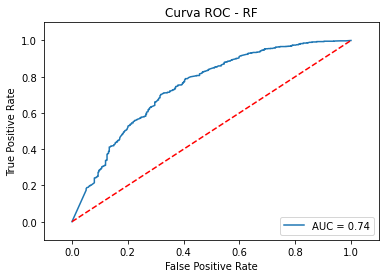

In [21]:
# Curva ROC - XGBoost
plotarCurvaROC('Curva ROC - RF', modelos["RF"], baseInternadoCurado, alvo)

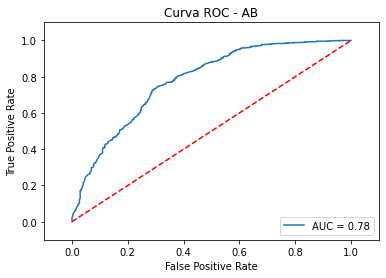

In [22]:
# Curva ROC - XGBoost
plotarCurvaROC('Curva ROC - AB', modelos["AB"], baseInternadoCurado, alvo)

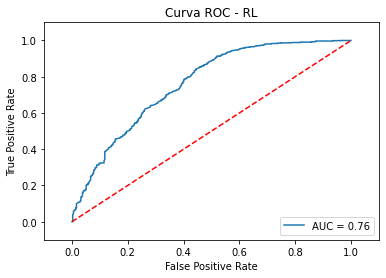

In [23]:
# Curva ROC - XGBoost
plotarCurvaROC('Curva ROC - RL', modelos["LR"], baseInternadoCurado, alvo)

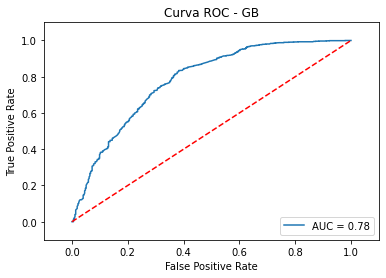

In [24]:
# Curva ROC - XGBoost
plotarCurvaROC('Curva ROC - GB', modelos["GB"], baseInternadoCurado, alvo)